# Анализ рынка продаж компьютерных игр


**Цель проекта**

На основе данных из открытых источников выявить закономерности, определяющие успешность игр.

В ходе анализа необходимо проверить две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One  и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. "действие", экшен-игры) и Sports(англ. "спортивные соревнования") разные.


Исследование позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Входные данные**

Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за 2016 год.


**Ход исследования**

Исследование пройдёт в четыре этапа:

*    Обзор данных;
*    Предобработка данных, включая дополнительные расчеты;
*    Анализ данных;
*    Проверка гипотез.

## Обзор данных

In [7]:
# импорт библиотек

from scipy import stats as st
from math import factorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [9]:
games = pd.read_csv('vgsales.csv')

In [11]:
# обзор датафрейма games

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Мы видим, что датафрейм содержит одиннадцать столбцов. Согласно документации:

- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - год выпуска
- `Genre` - жанр игры
- `NA_sales` - продажи в Северной Америке (млн. проданных копий)
- `EU_sales` - продажи в Европе (млн. проданных копий)
- `JP_sales` - продажи в Японии (млн. проданных копий)
- `Other_sales` - продажи в других странах (млн. проданных копий)
- `Critic_Score` - оценка критиков (максимум 100 баллов)
- `User_score` - оценка пользователей (максимум 10 баллов)
- `Rating` - возрастной рейтинг организации ESRB (англ. Entertainment Spftware Rating Board)

**Выводы**

Мы ознакомились с таблицей. Заметно, что тип данных в столбцах не всегда корректный (например, пользовательский рейтинг с типом `object` или год релиза с типом `float`). Так же нужно проверить данные на наличие дубликатов, по возможности, заполнить пропуски  и сгуппировать данные для наглядности.

Приступаем к предобработке данных.

## Предобработка данных

Приведем наименования столбцов в нижний регистр.

In [13]:
games.columns = games.columns.str.lower()

У года релиза изменим тип на цельночисленный, подсчитаем пропуски, и , если их будет сравнительно мало - удалим.

In [17]:
games['year'].isna().sum() # кол-во пропусков

np.int64(271)

In [18]:
games['year'].isna().sum()/ len(games['year'])    # доля пропусков

np.float64(0.016327268345583804)

In [19]:
games = games.dropna(subset=['year'])    # удаляем строки 
games['year'] = games['year'].astype('int')    # меняем тип данных на цельночисленный
games['year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [22]:
games = games.loc[games['name'].notnull()]    # удаляем строки с незаполненным значением name

In [23]:
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,0.265415,0.147554,0.078661,0.048325,0.540232
std,0.821591,0.508766,0.311557,0.189885,1.565732
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


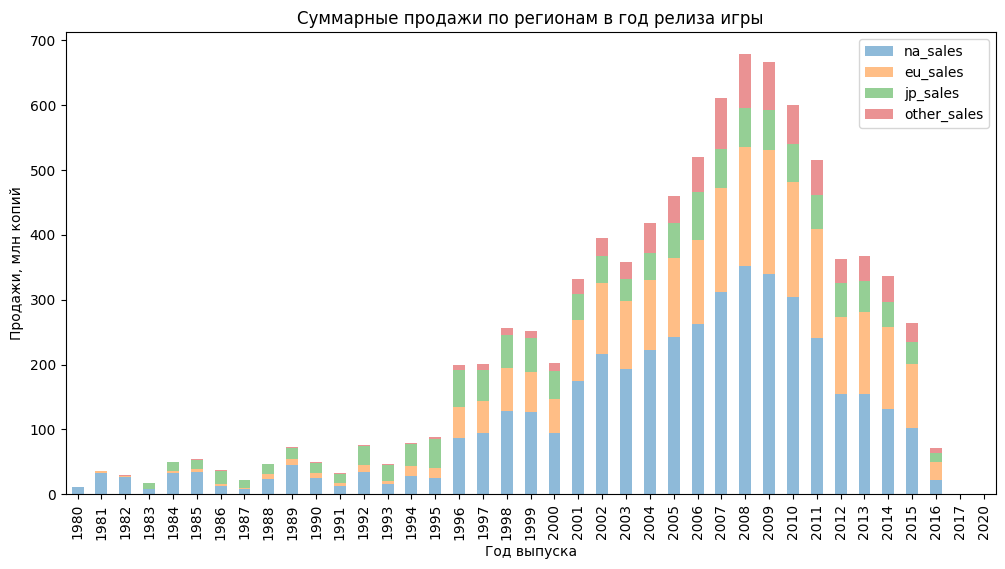

In [24]:
fig, ax = plt.subplots()

(games
 .groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в год релиза игры')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

Рынок в Северной Америке - самый большой, далее идет Европа. Рынок игр Японии сопоставим по продажам со всеми остальными ('other') странами.

## Анализ продаж (EDA)

### Год выпуска

Посмотрим, сколько игр выпускалось в разные годы: построим свод с количеством игр по платформам и годам. 

In [26]:
games_years = games.pivot_table(index = 'platform', 
                                columns = 'year', 
                                values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
                               
pd.set_option('display.max_columns', None)
games_years

year,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,79,86,35,0,0,500
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,202,377,492,405,326,153,25,9,1,0,0,0,1,2133
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


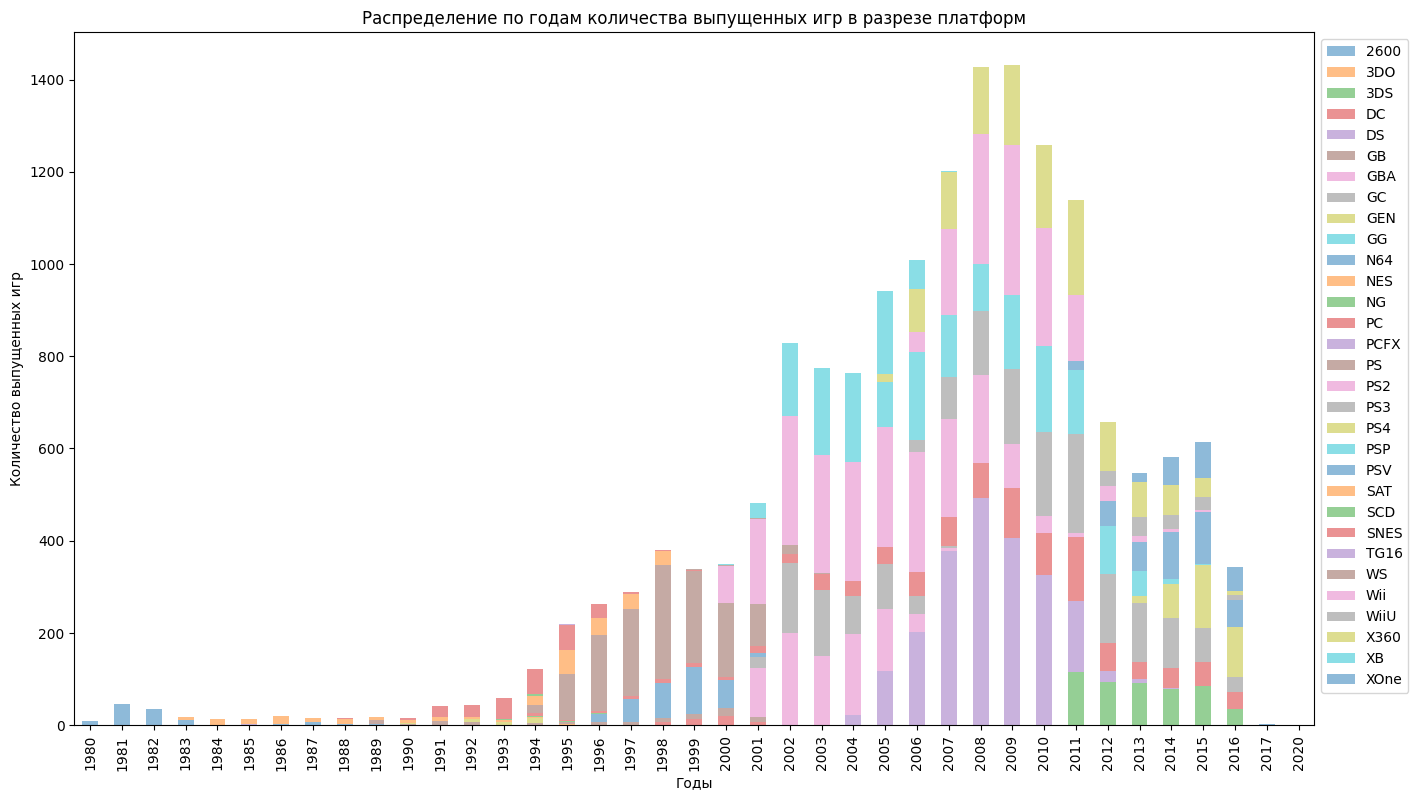

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))

games.pivot_table(index='platform',
              columns='year',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,9), alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам количества выпущенных игр в разрезе платформ')

plt.show()

Итак, мы видим, что: 

- наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы;

- наибольшее количество игр выпустили платформы PS2 и PS3 (производитель Sony),  DS и Wii (производитель Nintendo), X360 (производитель Microsoft);

- есть платформы, которые больше не выпускают игры и наборот, есть активные (на момент выгрузки данных) производители.

С учетом того, что целью данного исследования является выявление закономерности успешных игр, смотреть на данные платформ, которые не выпускали игры продолжительное время, не стоит.

### Продажи

In [29]:
games[['platform', 'global_sales']].sort_values(by='global_sales', ascending=False)

,platform,global_sales
0,Wii,82.74
1,NES,40.24
2,Wii,35.82
3,Wii,33.00
4,GB,31.37
...,...,...
16184,PS2,0.01
16185,PSP,0.01
16186,PC,0.01
16187,PC,0.01


Определим ТОП-7 платформ с наибольшими суммарными продажами.

In [32]:
games.groupby('platform').sum()[['global_sales']].sort_values(
    by='global_sales', ascending=False
).head(7)

,global_sales
platform,
PS2,1233.46
X360,969.61
PS3,949.35
Wii,909.81
DS,818.96
PS,727.39
GBA,313.56


На примере платформ с наибольшими суммарными продажами построим распределение продаж по годам.

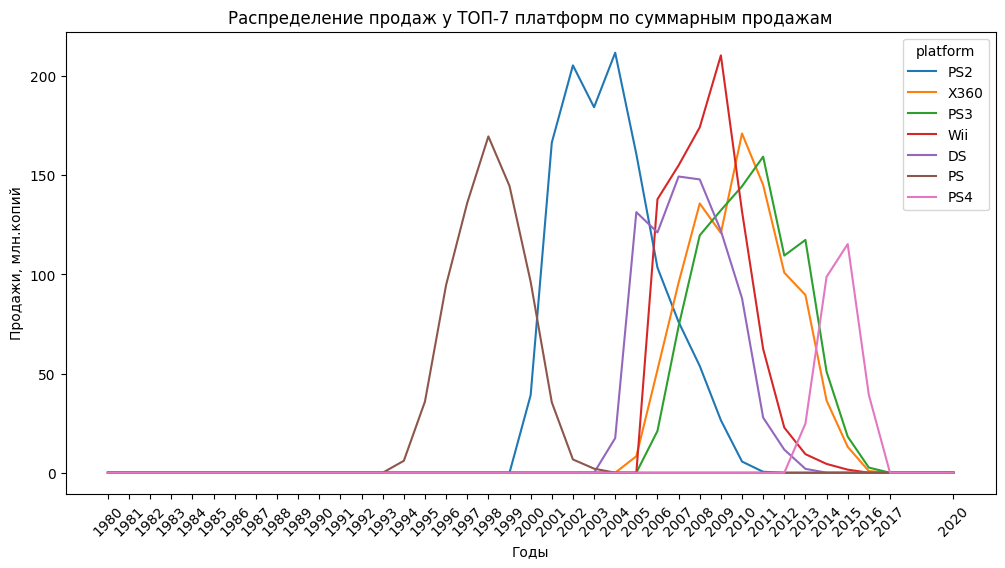

In [33]:
data_top_sales = games.pivot_table(
    index = 'year', 
    columns = 'platform',
    values = 'global_sales', 
    aggfunc = 'sum'
    ).fillna(0)

data_top_sales = data_top_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS', 'PS4']]
ax = data_top_sales.plot(xticks=data_top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж у ТОП-7 платформ по суммарным продажам')
plt.show()    

Заметно, что цикл появления новых и исчезновения старых платформ составляет примерно 12 лет. Таким образом, для прогнозирования подаж на следующий год нужно использовать данные за последние 5-ть лет: платформы, продажи которых растут в течение этого срока, являются наиболее перспективными (т.к. есть еще пара лет до пика продаж + впереди достаточно большой срок, когда продажи будут падать, но все еще будут приносить достаточно денег).

Давайте посмотрим данные за 2012-2016 г., чтобы понять, какие платформы окажутся в лидерах.

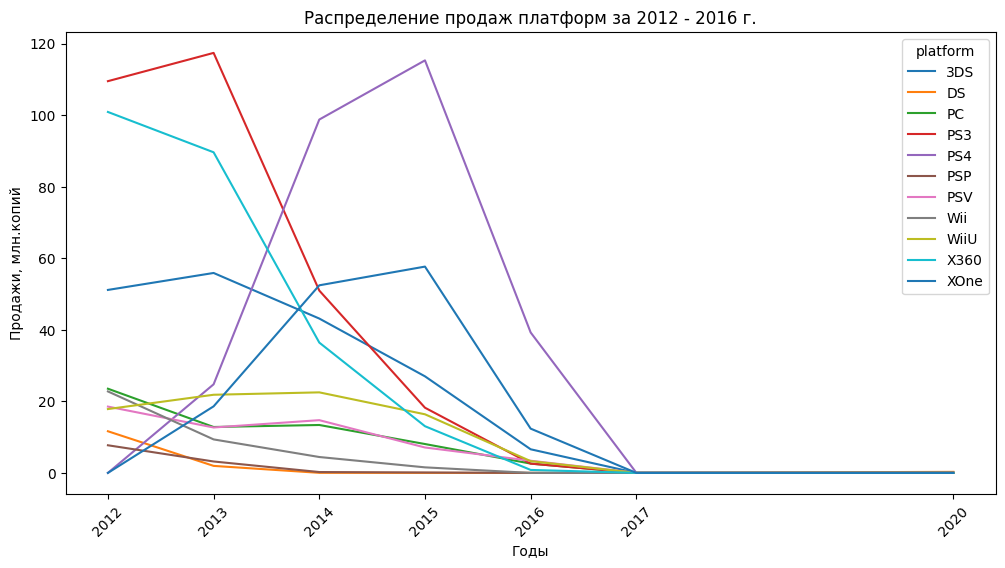

In [36]:
data_sales = games.query('year >= 2012').pivot_table(
    index = 'year', 
    columns = 'platform',
    values = 'global_sales', 
    aggfunc = 'sum'
    ).fillna(0)

ax = data_sales.plot(xticks=data_sales.index,figsize=(12,6))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж платформ за 2012 - 2016 г.')
plt.show()   


Итак, самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft. Какое-то время будут актуальны игры для платформ Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3. Остальные платформы уже упали в продажах и ждать второго дыхания в 2017 году не стоит. Конечно, на графике виден спад абсолютно всех продаж в 2016 году, но возможно это связано с тем, что просто нет полных данных за этот период.

Так же любопытно, что на примере Sony PlayStation 3 и Sony PlayStation (или Xbox One и Xbox 360) можно увидеть смену поколений, когда игры выпускаются как для старой платформы, так и для новой.

### Анализ продаж перспективных платформ

Итак, мы с вами определили, что перспективными платформами являются PS4, PS3, XOne, X360, WiiU и 3DS, а актуальный период исследования - 5 лет, т.е. 2012-2016 годы.

Поготовим данные с помощью фильтрации.

In [37]:
games_top = games.query('year >= 2012 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]')
games_top.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


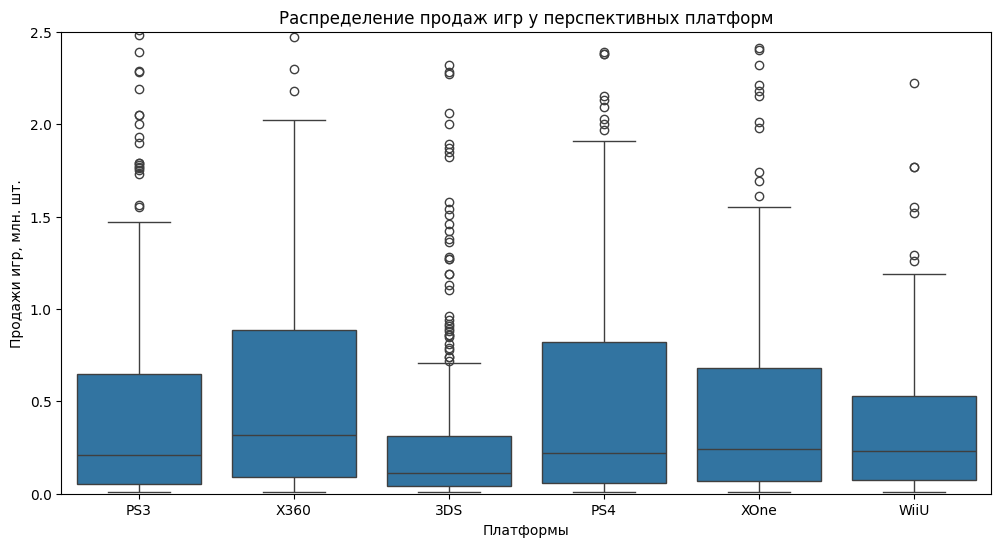

In [39]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='platform', y='global_sales', data=games_top)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами. При этом везде есть небольшое количество бестселлеров, продажи которых могут многократно превышать обычные значения.

### Жанры игр и продажи

Теперь посмотрим распределение игр по жанрам. Есть ли наиболее прибыльные (или наоборот) жанры? Анализ будем проводить на примере перспективных платформ за последние пять лет выборки.

In [41]:
games_top['genre'].value_counts()

genre
Action          674
Role-Playing    219
Sports          207
Shooter         178
Misc            125
Adventure       123
Fighting         86
Racing           83
Platform         66
Simulation       47
Strategy         32
Puzzle           19
Name: count, dtype: int64

In [43]:
games_top.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'global_sales',
    aggfunc='sum',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
All,183.75,298.65,278.10,81.86,240.79,141.06,1224.21
Action,44.39,119.25,87.06,19.35,83.38,33.79,387.22
Shooter,0.13,62.67,75.32,6.17,73.68,51.61,269.58
Sports,4.26,45.93,50.07,3.32,36.64,23.97,164.19
Role-Playing,70.79,23.34,25.77,2.47,10.09,9.48,141.94
Misc,8.93,9.10,7.40,12.23,14.92,6.86,59.44
Platform,18.84,4.46,7.01,21.24,2.09,0.81,54.45
Racing,0.29,12.64,11.53,7.77,8.88,8.80,49.91
Fighting,8.35,11.21,8.04,6.36,5.06,2.31,41.33


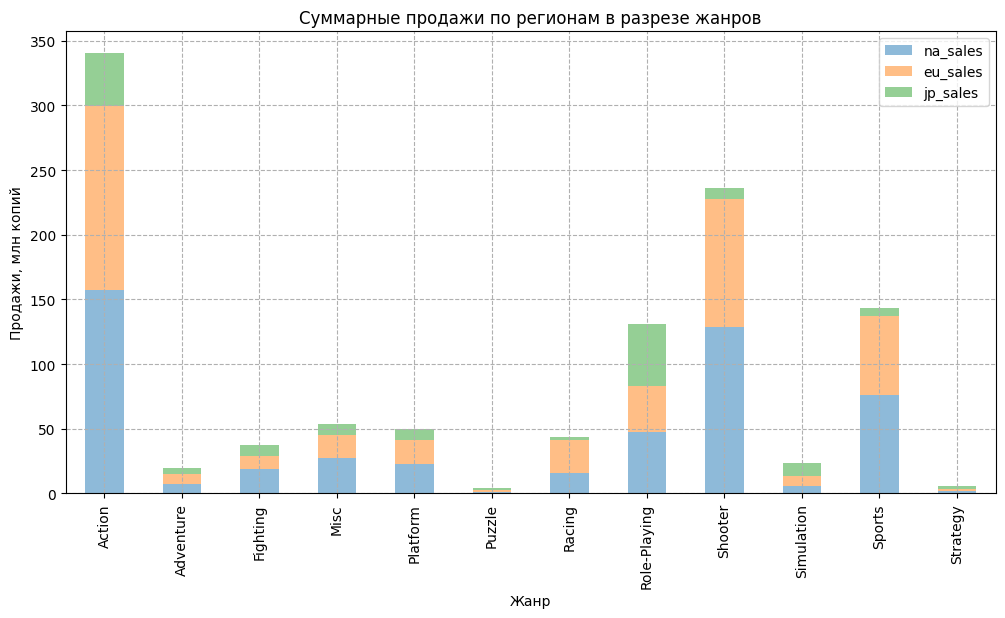

In [44]:
fig, ax = plt.subplots()

(games_top
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

Самыми продаваемыми жанрами в играх являются Action, Shooter и  Sports. 

* `Action` - сущность экшенов отражает их название – в переводе с английского оно означает «действие», и здесь игрок находится в самом центре действия и управляет им. 

* `Shoters` - шутеры позволяют игрокам использовать в своих действиях оружие, обычно с целью уничтожить врагов или противоборствующих игроков. Шутеры делятся по ракурсу обзора игрока (от первого лица, от третьего лица, с обзором сверху)ю

* `Sports` - спортивные игры, как и следует из названия, симулируют различные виды спорта, например, гольф, баскетбол, обычный и американский футбол. Встречаются также олимпийские виды спорта типа лыжных гонок, и даже «барный спорт» вроде бильярда или дартс. 


А вот самые низкие продажи у игр в жанрах Adventure, Strategy и Puzzle.

* `Adventure` - обычно в приключенческих играх пользователи взаимодействуют с другими персонажами и окружающим миром для решения головоломок с подсказками, продвигаясь таким образом по сюжету. Не считая периодических мини-игр, в квестах редко встречаются экшен-элементы. Поэтому среди мейнстримных геймеров жанр не так популярен.

* `Strategy` - геймплей этого жанра уходит своими корнями в традиционные настольные стратегические игры. Часто в этих играх вам доступен целый мир и все его ресурсы, а чтобы справиться с испытаниями, игроку требуется тщательно продумывать стратегию и тактику. 

* `Puzzle` - думаем, что здесь пояснения не нужны.

Нельзя не отметить, что одна из платформ(3DS) достаточно успешно специализируется в жанре `Role-Playing`  (ролевые игры, или RPG; одной из знаковых особенностей жанра является выбор игрока, влияющий на итог игры, то есть у многих RPG есть несколько альтернативных концовок).

Давайте построим аналогичный график для среднего количества продаж.

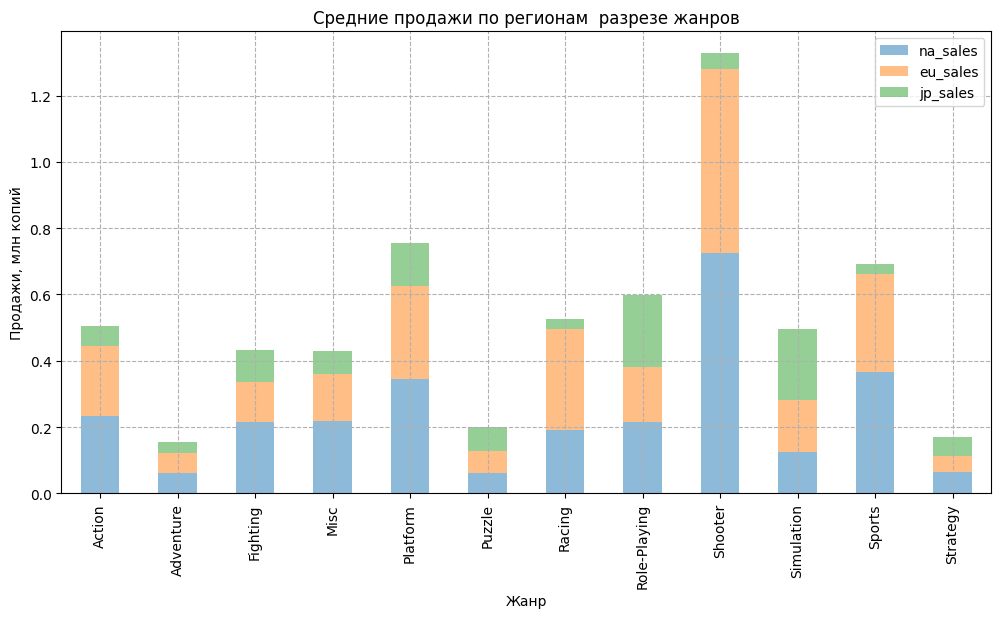

In [45]:
fig, ax = plt.subplots()

(games_top
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('mean')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Средние продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

По среднему количеству продаж мы наблюдаем смещение лидеров: теперь на первом месте по продажам - `Shooters`, а в тройке лидеров появляется жанр `Platform`. `Action` выбыл из топ-5. 

Такой результат говорит нам о том, что этих жанрах есть игры-хиты с многомиллионными продажами.

`Platform` - вид аркад, в которых нужно, управляя героем, ходить, бегать и запрыгивать на разные платформы (или возвышенности), в большинстве случаев, нейтрализуя или избегая врагов, и собирать различные бонусы.


## Исследование продаж в разрезе рынков

### Популярные платформы  и жанры

Давайте определим для каждого региона (EU, NA и JP) самые популярные платформы. Для этого подсчитаем долю продаж за последние 5-ть лет.

In [48]:
games_top.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,9.3%,56.9%,10.0%
PS3,26.7%,23.6%,20.0%
PS4,28.9%,9.6%,19.0%
WiiU,5.7%,8.6%,7.5%
X360,18.7%,1.1%,27.2%
XOne,10.7%,0.2%,16.3%


Мы видим разницу в предпочтениях визуально: европейские пользователи предпочитают Sony PlayStation (более 55% рынка), американские - Microsoft XBox (более 43% рынка), японские геймеры голосуют деньгами за Nintendo 3DS(57%).

In [49]:
games_top.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,33.2%,27.5%,30.9%
Adventure,1.8%,2.8%,1.5%
Fighting,2.4%,5.6%,3.6%
Misc,4.2%,5.9%,5.3%
Platform,4.3%,5.7%,4.5%
Puzzle,0.3%,1.0%,0.2%
Racing,5.9%,1.6%,3.1%
Role-Playing,8.4%,32.0%,9.3%
Shooter,23.1%,5.8%,25.2%


В распределении долей рынка по жанрам у пользователей Америки и Европы вкусы совпадают  по первым четырем пунктам из ТОП5: Action -> Shooters -> Sports -> Role_playing. А вот на пятой строчке в Европе гонки, в то время как у жителей Северной Америки - Misc (от англ. Miscellaneuos = разное или прочее).

У японцев все иначе: Role-Playing -> Action -> Simulation -> Shooters и Misc.

Если подвести итоги, то:

* в Северной Америке  самая большая доля рынка от глобальных продаж, а самые продаваемые платформы принадлежат местному производителю Microsoft;

* Европа второй по величине рынок; абсолютным лидером среди платформ является Sony Playstation;Европа и Северная Америка похожи – главные жанры Action, шутеры и спорт;

* Япония занимает третье место по продажам; рынок не похож на остальные: местные производители целиком и полностью доминируют по продажам, оставив остальным производителям всего около 1% рынка; в жанровых препочтениях Япония – единственный рынок, где предобладает RPG. 

## Вывод

Итак, на основе исторических данных о продажах игр за 2016 нам необходимо было выявить закономерности, определяющие успешность игр.

В ходе исследования мы сделали следующие выводы:

* самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft. Какое-то время будут актуальны игры для платформ Nintendo 3DS;

* если делить по рынкам, то в Америке следует сделать ставку на игры платформы Xbox One, в Европе - на PS4, а в Японии  - на 3DS;

* из жанров мы рекомендуем выбрать игры в стиле Action,Shoters и Sports (а вот для японского рынка любимым жанром является Role-Playing);

* оценки пользователей на продажи не влияют, а вот к оценкам критиков можно и приглядется (но, в общем и целом, корреляци с продажами даже у этих оценок не очень сильная).

Так же, мы проверили две гипотезы, заявленные в самом начале исследования. В результате этого:

* средние пользовательские рейтинги Xbox One и PC различаются (различие средних значений статистически значимо); 

* гипотеза о различии средних значений пользовательских оценок игр двух жанров Action и Sports не была отвергнута.